In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm
import seaborn as sns
sns.set_style('darkgrid')

def plot_gaussian_density():
    fig, ax = plt.subplots(1,1, figsize=(4,3))
    dom = np.linspace(-3.0, 3.0, num=50)
    ax.plot(dom, norm.pdf(dom))
    plt.show()

n = 11
np.random.seed(5)    
x = np.random.uniform(low=-1.0, high=1.0, size=n)
y = 10*((x-0.9)*(x+0.3)*(x+0.9) + (0.2*x)) + np.random.normal(scale=0.3, size=n)

def scatter_plot_data(x_=x, y_=y):
    fig, ax = plt.subplots(1,1, figsize=(7,5))
    ax.scatter(x_, y_); plt.show()
    
def to_pows(x_, maxd=10):
    x_ = x_.flatten()
    X_arr = np.concatenate([np.power(x_, i).reshape([-1,1]) for i in range(maxd+1)],
                           axis=1)
    return X_arr    

X_arr = to_pows(x)
print(X_arr.shape)

lr = LinearRegression(fit_intercept=False)
lr.fit(X_arr, y)

lasso = Lasso(fit_intercept=False, alpha=0.007)
lasso.fit(X_arr, y)

def plot_models(models, x_=x, y_=y,
               extra=0.2, x_pad=0.3, y_pad=0.5):
    global lr, lasso
    fig, ax = plt.subplots(1,len(models), figsize=(14,5))
    dom = np.linspace(x_.min()-extra, x_.max()+extra, num=100).reshape([-1,1])
    for i, k in enumerate(models.keys()):
        ax[i].set_xlim([x_.min()-x_pad, x_.max()+x_pad])
        ax[i].set_ylim([y_.min()-y_pad, y_.max()+y_pad])
        label = "{}".format(k)
        ax[i].scatter(x_, y_)
        ax[i].plot(dom.flatten(), models[k].predict(to_pows(dom)), color='C'+str(i+1), label=label)
        ax[i].legend()
    #plt.legend()
    plt.show()
    
print(lr.coef_)
print(lasso.coef_)    


(11, 11)
[  -2.07346858   -2.99140114  -19.18316512  -67.76437496  111.410094
  440.70170094  -59.29218713 -843.35230004 -319.40896865  518.58975313
  340.45971226]
[-2.220364   -4.82575537  2.45851511  8.03859672 -0.          0.
 -0.          0.         -0.          0.         -0.        ]


# Formulating machine learning objectives with MLE and MAP

- MLE : Maximum likelihood estimate
- MAP : Maximum a posteriori

### Linear regression:
Given data set $\mathcal{D} = (\mathbf{x}^{(1)}, y^{(1)}), ..., (\mathbf{x}^{(m)}, y^{(m)})$,
we want to learn vector of coefficients ${\Theta}$ so that:
$$\large
y = \mathbf{\Theta}^T\mathbf{x} + \epsilon
$$
equivalently,
$$\large
y = \theta_0 + \theta_1 x_1 + ... + \theta_d x_d + \epsilon
$$


* $\mathbf{x}^{(i)} = (x^{(i)}_0,..., x^{(i)}_d)$ are the input feature vectors.
* $\Theta = (\theta_0, ..., \theta_d)$ is the vector of coefficients, also called the model parameters.
* The error $\epsilon$ is $\mathcal{N}(0, \sigma^2)$ (normally distributed with mean $0$)

### Linear regression:
$$y = \mathbf{\Theta}^T\mathbf{x} + \epsilon = \theta_0 + \theta_1 x_1 + ... + \theta_d x_d + \epsilon
$$
Goal: we want to minimize this
$$\text{Loss} = \frac{1}{m} \sum_{i=1}^m {(y^{(i)} - \Theta^T\mathbf{x}^{(i)} )^2}
$$
This is the _least-squares_ objective.

**Question:** Why is this the right objective to minimize? Why not
$$\frac{1}{m} \sum_{i=1}^m |y^{(i)} - \Theta \mathbf{x}^{(i)}| $$
Or
$$\frac{1}{m} \sum_{i=1}^m (y^{(i)} - \Theta \mathbf{x}^{(i)})^4 $$ ?


### Lasso regression:
Similar to basic linear regression, but with objective of minimizing:
$$\text{Loss} = \frac{1}{m}\left(\sum_{i=1}^m {(y^{(i)} - \Theta^T\mathbf{x}^{(i)} )^2} \right) + \left(\alpha  \sum_{i=0}^d \theta_d\right)
$$

- $\left(\alpha  \sum_{i=0}^d \theta_d \right)$ is the regularization term.



- **Question:** What's a better explanation for the regularization term:   $\left(\alpha  \sum_{i=0}^d \theta_d\right)$,  besides the fact that it works well?


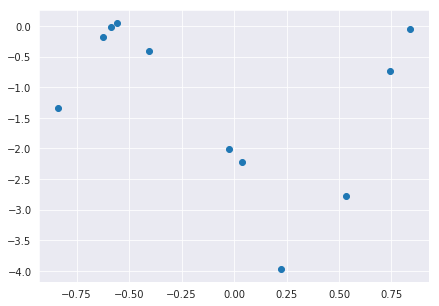

In [2]:
# Linear and Lasso regression demo
scatter_plot_data()

We will fit a polynomial of degree $ \le 10$ to the data using simple Linear regression and Lasso regression.

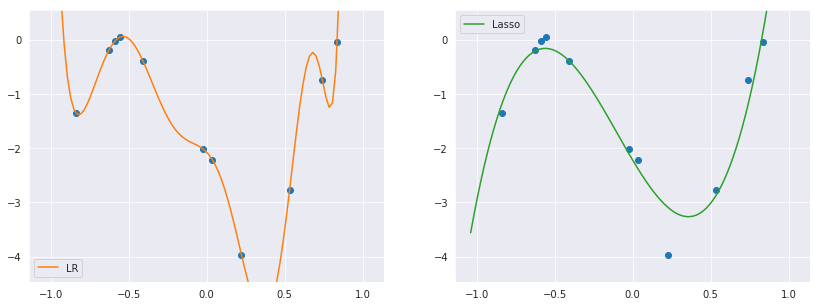

In [3]:
plot_models({'LR': lr, 'Lasso':lasso})

In [4]:
print(lr.coef_)
print(lasso.coef_)

[  -2.07346858   -2.99140114  -19.18316512  -67.76437496  111.410094
  440.70170094  -59.29218713 -843.35230004 -319.40896865  518.58975313
  340.45971226]
[-2.220364   -4.82575537  2.45851511  8.03859672 -0.          0.
 -0.          0.         -0.          0.         -0.        ]


Lasso works very well, can do feature selection!

# Probability theory

$$\DeclareMathOperator*{\argmax}{argmax} $$
$$\DeclareMathOperator*{\argmin}{argmin} $$

### Preview of how we'll use probability:

$\Theta = (\theta_0,...,\theta_d)$

Imagine $\Theta$ lives in the space of all possible parameters. We will want to find the "most likely" $\Theta$ given the data $\mathcal{D}$. That is, find:
 $$\argmax_\Theta  p(\Theta|\mathcal{D}). $$

### Probability: notations

* If $A$ is an _event_, $P(A)$ denotes the _probability of $A$_. 
* $P(A)$ is a number between 0 and 1.
---
* If $A, B$ are 2 events, the probability of "$A$ and $B$" is denoted by $P(A, B)$ (also sometimes written as $P(A\cap B)$).




### Probability: conditional
* Given _events_ $A, B$, we denote $P(A|B)$ the conditional probablity of $A$ given $B$, and it is defined as:
$$
P(A|B) := \frac{P(A,B)}{P(B)}
$$

**Example**: Given a population of people, each person has `age` and `height` attributes, let $A$="`age < 10`" and $B$="`height > 1.6m`".

Let $T$ be the total number of people.
$$
P(A|B) = \frac{P(A,B)}{P(B)} = \frac{\text{#( age<10 and height>1.6 )} / T}{\text{#( height>1.6 )} / T}
$$
$$
P(A|B) = \frac{\text{#( age<10 and height>1.6 )} }{\text{#( height>1.6 )} }
$$

You can think of $P(A|B)$ as probability of $A$ in the _restricted population of just $B$_.

### Bayes' rule: (on events)
Given the definition $P(A|B) := \frac{P(A,B)}{P(B)}$ for any 2 events $A, B$, it follows that:
$$
P(A|B) = \frac{P(B|A) . P(A)}{P(B)}
$$

$P(A|B) P(B) = P(A, B) = P(B|A)P(A)$
So $$
P(A|B) = \frac{P(B|A) P(A)}{P(B)}
$$

### Continuous random variable
If $x$ is a continuous random variable, $p(x)$ denotes the density function of $x$.
+ For example: The bell curve - density function for a Gaussian/Normal random variable
+ **Note**: Writing $p(x)$ is slight abuse of mathematical notation, since $x$ here means both the random variable and the possible $\mathbb{R}$ values of this variable. (The proper way is to name the random variable $X$ and its density $p_X(x)$, but we will go with $p(x)$ for short. Just remember that $p(x)$ and $p(y)$ are different density functions even though they are both named $p$)

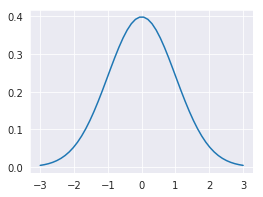

In [5]:
plot_gaussian_density()

**Question**: what properties must a probability density function have?

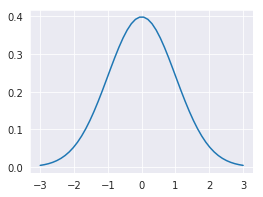

In [6]:
plot_gaussian_density()

$$\int_{-\infty}^\infty p(x)dx = 1$$
* $x$ in the above equation is simply the possible real values of the random variable whose density function is $p$.

If $\mathbf{x}=(x_1, x_2)$ is 2-dimensional
$$\int p(\mathbf{x}) d\mathbf{x} = \iint p(x_1, x_2) dx_1 dx_2 = 1.$$
This generalizes to $\mathbf{x}$ of any dimension.

(Draw figure)

### Joint and marginals
Let $x, y$ be 2 continuous real valued random variables. (For example `(age, height)` of members of a population.)
* $p(x,y)$ is called the joint probability distribution of $x, y$.
* $p(x)$ and $p(y)$ are the marginal distributions. We have
$$p(x) = \int_{-\infty}^\infty p(x,y) dy$$
and 
$$p(y) = \int_{-\infty}^\infty p(x,y) dx$$


### Marginal distributions
![alt text](https://upload.wikimedia.org/wikipedia/commons/8/8e/MultivariateNormal.png "Logo Title Text 1")

### Conditional density
$$p(x|y) := \frac{p(x, y)}{p(y)} = \frac{p(x,y)}{\int_{-\infty}^\infty p(x,y)dx} $$ 
**Note:**
* $p(x|y)$ is a function of 1 variable over $x$, but for each different $y$ we have a different such function.

#### Bayes' rule for densities:
$$
p(x|y) = \frac{p(y|x)p(x)}{p(y)} 
$$
* The denominator $p(y)$ is constant as $x$ varies. So we can think of it as a normalizing constant. Thus $p(x|y)$ is proportional to $p(y|x)p(x)$ as functions of $x$. (Think of $y$ as fixed).
* We write $p(x|y) \propto p(y|x)p(x)$ to indicate that these functions are proportional.

### Being bayesian:
The Bayes' rule from previous slide extend to higher dimensions - from $x,y$ to vectors $\mathbf{x}, \mathbf{y}$

We can apply the general Bayes' rule for: $\Theta$ the vector of model parameters, and $\mathcal{D}$ the vector of observed data points:
$$
p(\Theta|\mathcal{D}) = \frac{p(\mathcal{D}|\Theta)p(\Theta)}{p(\mathcal{D})} 
$$
Each term has a meaning:
- $p(\Theta|\mathcal{D})$ (the posterior): our belief as to which parameters are likely after observing data
- $p(\Theta)$ (the prior): our belief as to which parameters are likely before observing data
- $p(\mathcal{D}|\Theta)$ (the likelihood): how likely to have observed $\mathcal{D}$ given model $\Theta$
- $p(\mathcal{D})$: the normalizing constant.


$$
p(\Theta|\mathcal{D}) \propto p(\mathcal{D}|\Theta)p(\Theta)
$$
### Goal:

- Find the $\Theta$ that maximizes $p(\Theta|\mathcal{D})$. (That is, find $\argmax_\Theta p(\Theta|\mathcal{D})$.) This is called the maximum a posteriori (MAP) estimate. By Bayes' rule, this is equivalent to maximizing ${p(\mathcal{D}|\Theta)p(\Theta)}$.


- If we assume a uniform prior: $p(\Theta)$ is a constant, then the above is equivalent to only maximizing the likelihood: $p(\mathcal{D}|\Theta)$. This is called the maximum likelihood estimate (MLE).

**Note**: MLE is a special case of MAP when we assume uniform prior.

### Back to linear regression:
Recall the hypothesis for linear regression:
$$
y = \Theta^T \mathbf{x} + \epsilon
$$
where $\epsilon \sim \mathcal{N}(0, \sigma^2)$.

That's equivalent to $y \sim \mathcal{N}(\Theta^T \mathbf{x}, \sigma^2)$.

So
$$
    p(y|\mathbf{x}, \Theta) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(y - \Theta^T\mathbf{x})^2}{2\sigma^2}\right).
$$

Expanding "data" $\mathcal{D} = \mathbf{x}^{(1)}, y^{(1)}, ... \mathbf{x}^{(m)}, y^{(m)} $ we have 

Maximizing $p(\mathcal{D}|\Theta)$ $\iff$ maximizing $p(\mathbf{x}^{(1)}, y^{(1)}, ... \mathbf{x}^{(m)}, y^{(m)} | \Theta)$

$\iff$ maximizing  $ \prod_{i=1}^m p(\mathbf{x}^{(i)}, y^{(i)}|\Theta)$

$\iff$ maximizing $ \log\left(\prod_{i=1}^m p(\mathbf{x}^{(i)}, y^{(i)}|\Theta)\right) =  \sum_{i=1}^{m}\log\left(p(\mathbf{x}^{(i)}, y^{(i)}|\Theta)\right)$

$\iff$ minimizing $ -  \sum_{i=1}^{m}\log\left(p(\mathbf{x}^{(i)}, y^{(i)}|\Theta)\right)$

$\iff$ minimizing $ -  \sum_{i=1}^{m}\log\left(p(\mathbf{x}^{(i)}, y^{(i)}|\Theta)\right)$

$\iff$ minimizing $ - \sum_{i=1}^{m}\log\left[\left(p(y^{(i)}|\mathbf{x}^{(i)}, \Theta)\right) \left(  p(\mathbf{x}^{(i)}|\Theta)\right)\right]$ $= - \sum_{i=1}^{m}\log\left[\left(p(y^{(i)}|\mathbf{x}^{(i)}, \Theta)\right) \left(  p(\mathbf{x}^{(i)})\right)\right]$

$\iff$ minimizing  $- \sum_{i=1}^{m}\log\left(p(y^{(i)}|\mathbf{x}^{(i)}, \Theta)\right) - \sum_{i=1}^m \log\left(  p(\mathbf{x}^{(i)})\right)$

$\iff$ minimizing  $- \sum_{i=1}^{m}\log\left(p(y^{(i)}|\mathbf{x}^{(i)}, \Theta)\right)$

$\iff$ minimizing  $$- \sum_{i=1}^{m}\log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(y^{(i)} - \Theta^T\mathbf{x}^{(i)})^2}{2\sigma^2}\right)\right)$$

$\iff$ minimizing  $$- \sum_{i=1}^m\log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) + \sum_{i=1}^m\frac{(y^{(i)} -\Theta^T\mathbf{x}^{(i)})^2}{2\sigma^2}$$

$\iff$ minimizing  $$ \sum_{i=1}^m(y^{(i)} -\Theta^T\mathbf{x}^{(i)})^2$$

### Conclusion:
$$\text{minimizing } \frac{1}{m}\sum_{i=1}^m {(y^{(i)} - \Theta^T\mathbf{x}^{(i)} )^2}
\iff \text{maximizing } p(\mathcal{D}|\Theta)
$$


### Exercise:
1. Follow the previous slides, prove that the Lasso objective:
$$\text{minimizing } \frac{1}{m}\sum_{i=1}^m {(y^{(i)} - \Theta^T\mathbf{x}^{(i)} )^2} + \left(\alpha  \sum_{i=0}^d \theta_d\right),$$
$\iff$ maximizing $p(\mathcal{D}|\Theta) p(\Theta)$ (the MAP estimate). What prior density $p(\Theta)$ give rise to the above Lasso objective?

2. The _cross entropy_ classification loss is also equivalent to MLE. Google search "cross entropy and maximum likelihood estimation" and do some reading.